# Understanding the data / Data preprocessing

In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tns
import sys


In [2]:
df002_train = pd.read_csv(r'C:\Users\elroy\OneDrive\Desktop\JetEngineFailureClassification\train_FD002.txt', sep='\s+', header=None)
df002_test = pd.read_csv(r'C:\Users\elroy\OneDrive\Desktop\JetEngineFailureClassification\test_FD002.txt', sep='\s+', header=None)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elroy\AppData\Local\Temp\ipykernel_3020\42666585.py:1: SyntaxWarning: invalid escape sequence '\s'
  df002_train = pd.read_csv(r'C:\Users\elroy\OneDrive\Desktop\JetEngineFailureClassification\train_FD002.txt', sep='\s+', header=None)
C:\Users\elroy\AppData\Local\Temp\ipykernel_3020\42666585.py:2: SyntaxWarning: invalid escape sequence '\s'
  df002_test = pd.read_csv(r'C:\Users\elroy\OneDrive\Desktop\JetEngineFailureClassification\test_FD002.txt', sep='\s+', header=None)


In [3]:
df002_train

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [4]:
df002_test

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,183.05,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065
33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,130.74,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075
33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,130.96,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805
33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,522.25,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589


# Column Meaning:
1) engine_id : Which engine this row belongs 

2) cycle : How many cycles (flights) this engine has flown

3) setting_1, setting_2, setting_3 : Operational settings (altitude, temperature, etc.)

4) s1 to s21 : Sensor readings (engine health parameters) 

In [5]:
columns = ['engine_id', 'cycle', 
           'altitude', 'mach_number', 'sea_level_temp', 
           'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 
           'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRe', 
           'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']
df002_train.columns = columns
df002_test.columns = columns


In [6]:
df002_train

,engine_id,cycle,altitude,mach_number,sea_level_temp,T2,T24,T30,T50,P2,...,phi,NRf,NRe,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


# Loading Train and Test Data for two mode fan degradation (HPC and Turbo-fan)

In [7]:
df004_train = pd.read_csv(r'C:\Users\elroy\OneDrive\Desktop\JetEngineFailureClassification\train_FD004.txt', sep='\s+', header=None)
df004_test = pd.read_csv(r'C:\Users\elroy\OneDrive\Desktop\JetEngineFailureClassification\test_FD004.txt', sep='\s+', header=None)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elroy\AppData\Local\Temp\ipykernel_3020\3257384835.py:1: SyntaxWarning: invalid escape sequence '\s'
  df004_train = pd.read_csv(r'C:\Users\elroy\OneDrive\Desktop\JetEngineFailureClassification\train_FD004.txt', sep='\s+', header=None)
C:\Users\elroy\AppData\Local\Temp\ipykernel_3020\3257384835.py:2: SyntaxWarning: invalid escape sequence '\s'
  df004_test = pd.read_csv(r'C:\Users\elroy\OneDrive\Desktop\JetEngineFailureClassification\test_FD004.txt', sep='\s+', header=None)


In [8]:
# Renaming columns names for FD004
df004_train.columns = columns
df004_test.columns = columns

In [175]:
df004_train

,engine_id,cycle,altitude,mach_number,sea_level_temp,T2,T24,T30,T50,P2,...,phi,NRf,NRe,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,380.16,2388.73,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,535.02,2388.46,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,535.41,2388.48,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,187.92,2388.83,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774


In [ ]:
df004_test

In [9]:
# Each engine has a different lifetime 
# so we find the maximum cycle of each engine separately 
# then at each cycle subtract to know how much life is left
# 1. Calculate max engine cycle for each engine: 
max_cycle_fd002 = df002_train.groupby('engine_id')['cycle'].max()
max_cycle_fd004 = df004_train.groupby('engine_id')['cycle'].max()

# 2. Merge max cycle info back into the Dataset: 
df002_train = df002_train.merge(max_cycle_fd002.to_frame('max_cycle'), on='engine_id', how='left')
df004_train = df004_train.merge(max_cycle_fd004.to_frame('max_cycle'), on='engine_id', how='left')

# 3. Calculate RUL (Remaining useful cycles: Max cycle - cycle)
df002_train['RUL'] = df002_train['max_cycle'] - df002_train['cycle']
df004_train['RUL'] = df004_train['max_cycle'] - df004_train['cycle']

df002_train.drop('max_cycle', axis=1, inplace=True)
df004_train.drop('max_cycle', axis=1, inplace=True)



# Data Cleaning 

In [10]:
# Checking null values
print(df002_train.isnull().sum())

engine_id         0
cycle             0
altitude          0
mach_number       0
sea_level_temp    0
T2                0
T24               0
T30               0
T50               0
P2                0
P15               0
P30               0
Nf                0
Nc                0
epr               0
Ps30              0
phi               0
NRf               0
NRe               0
BPR               0
farB              0
htBleed           0
Nf_dmd            0
PCNfR_dmd         0
W31               0
W32               0
RUL               0
dtype: int64


In [11]:
print(df004_train.isnull().sum())

engine_id         0
cycle             0
altitude          0
mach_number       0
sea_level_temp    0
T2                0
T24               0
T30               0
T50               0
P2                0
P15               0
P30               0
Nf                0
Nc                0
epr               0
Ps30              0
phi               0
NRf               0
NRe               0
BPR               0
farB              0
htBleed           0
Nf_dmd            0
PCNfR_dmd         0
W31               0
W32               0
RUL               0
dtype: int64


In [12]:
# Check for duplicates in df002_train
print("Duplicate rows in df002_train:", df002_train.duplicated().sum())

# Check for duplicates in df004_train
print("Duplicate rows in df004_train:", df004_train.duplicated().sum())


Duplicate rows in df002_train: 0
Duplicate rows in df004_train: 0


In [ ]:
# Outliers detection in each column:
def detect_outliers_iqr(df):
    outlier_sum = {}
    feature_cols = df.columns.drop(['engine_id', 'cycle', 'RUL']) 
    
    for col in feature_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_sum[col] = len(outliers)
    
    return outlier_sum

# Check outliers in df002_train
outliers_fd002 = detect_outliers_iqr(df002_train)
print("Outliers in df002_train:")
for feature, count in outliers_fd002.items():
    print(f"{feature}: {count} outliers")


Outliers in df002_train:
altitude: 0 outliers
mach_number: 0 outliers
sea_level_temp: 8002 outliers
T2: 0 outliers
T24: 0 outliers
T30: 0 outliers
T50: 0 outliers
P2: 0 outliers
P15: 0 outliers
P30: 0 outliers
Nf: 8002 outliers
Nc: 0 outliers
epr: 0 outliers
Ps30: 3433 outliers
phi: 0 outliers
NRf: 9640 outliers
NRe: 8049 outliers
BPR: 8002 outliers
farB: 0 outliers
htBleed: 0 outliers
Nf_dmd: 8002 outliers
PCNfR_dmd: 8002 outliers
W31: 0 outliers
W32: 0 outliers


In [14]:
# Check outliers in df004_train
outliers_fd004 = detect_outliers_iqr(df004_train)
print("\nOutliers in df004_train:")
for feature, count in outliers_fd004.items():
    print(f"{feature}: {count} outliers")


Outliers in df004_train:
altitude: 0 outliers
mach_number: 0 outliers
sea_level_temp: 9139 outliers
T2: 0 outliers
T24: 0 outliers
T30: 0 outliers
T50: 0 outliers
P2: 0 outliers
P15: 0 outliers
P30: 0 outliers
Nf: 9139 outliers
Nc: 0 outliers
epr: 0 outliers
Ps30: 3102 outliers
phi: 0 outliers
NRf: 11546 outliers
NRe: 9162 outliers
BPR: 9139 outliers
farB: 0 outliers
htBleed: 0 outliers
Nf_dmd: 9139 outliers
PCNfR_dmd: 9139 outliers
W31: 0 outliers
W32: 0 outliers


In [184]:
# Lets check from a statistical viewpoint on whether we should remove outliers
# According to Domain Knowledge:
# We don't need to remove outliers because the NASA Jet Engine senser outliers are not noise
# These outliers are considered valuable as they might show signs of degradation of engine.
df002_train['RUL'].describe().T

count    53759.000000
mean       108.154746
std         69.180569
min          0.000000
25%         51.000000
50%        103.000000
75%        156.000000
max        377.000000
Name: RUL, dtype: float64

In [159]:
df004_train['RUL'].describe().T

count    61249.000000
mean       133.311417
std         89.783389
min          0.000000
25%         61.000000
50%        122.000000
75%        190.000000
max        542.000000
Name: RUL, dtype: float64

# Lets visualize the data 

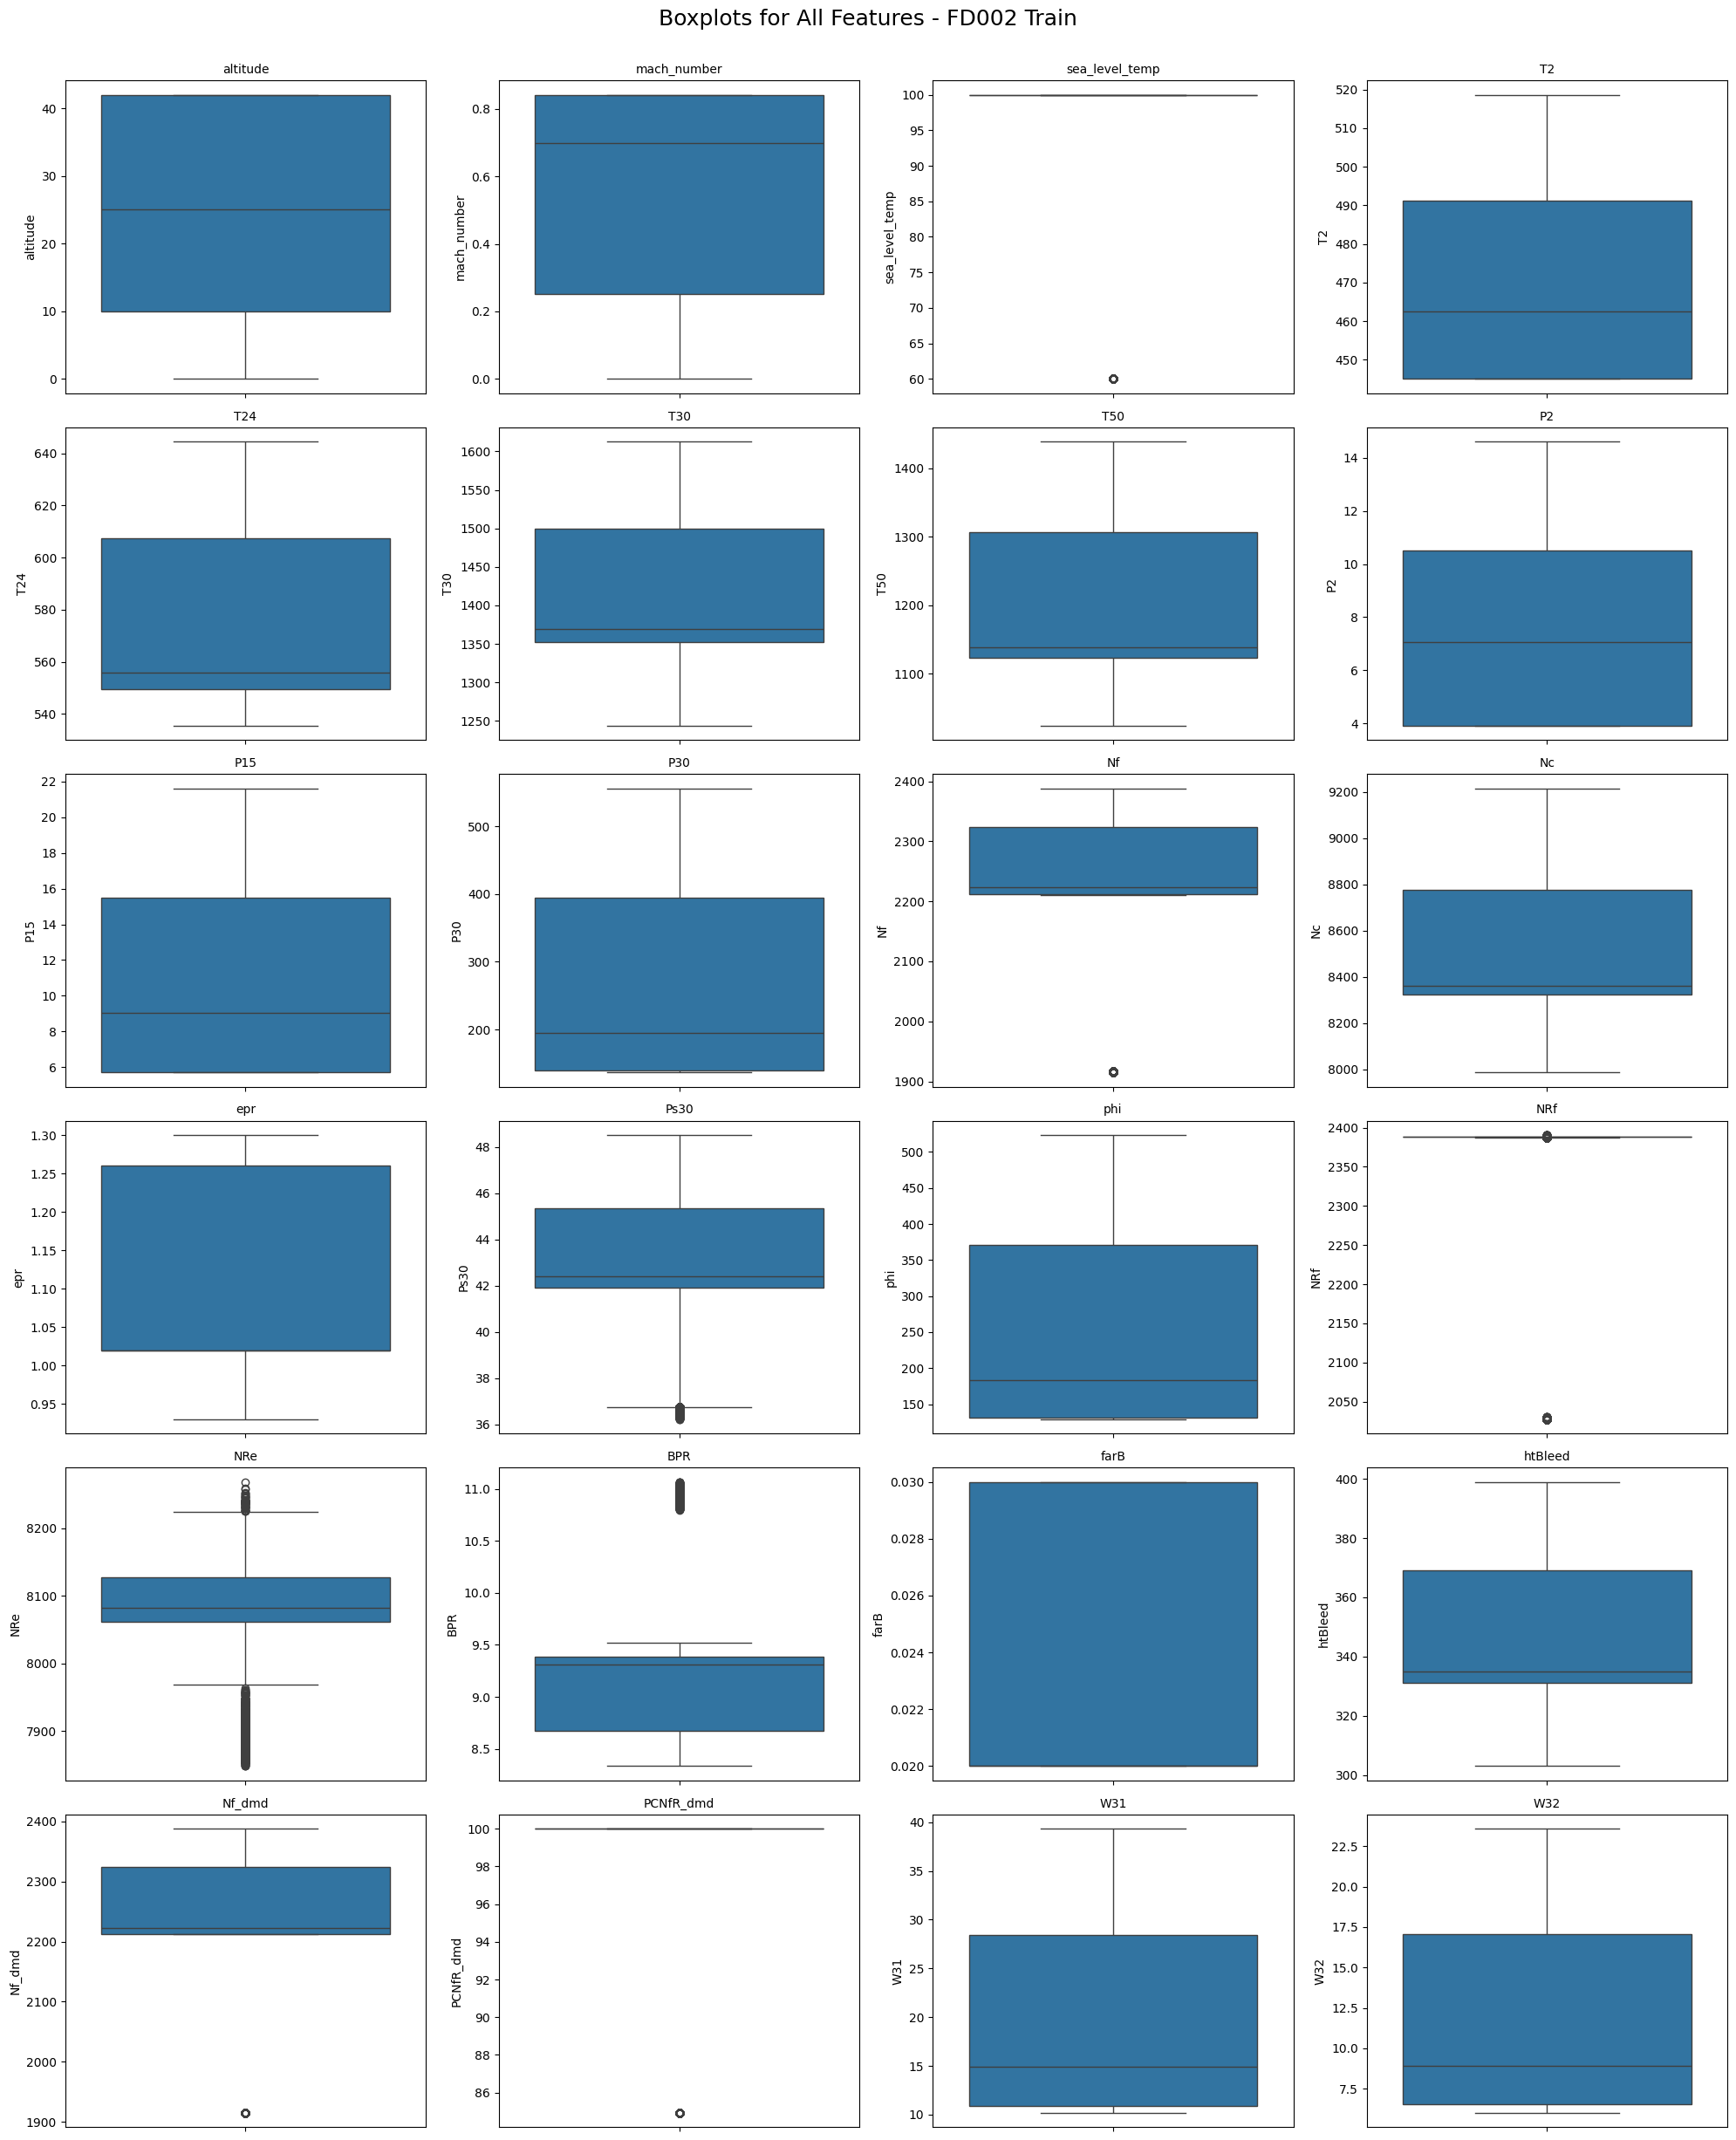

In [15]:
# Boxplots- to see sensor value ranges and we can detect extreme values for FD002
feature_cols1 = df002_train.columns.drop(['engine_id', 'cycle', 'RUL'])
n_features = len(feature_cols1)

# Create subplots
rows = 6
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 24))
axes = axes.flatten()
for idx, col in enumerate(feature_cols1):
    sns.boxplot(data=df002_train, y=col, ax=axes[idx])
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('') 
for j in range(idx + 1, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Boxplots for All Features - FD002 Train', fontsize=18, y=1.02)
plt.show()


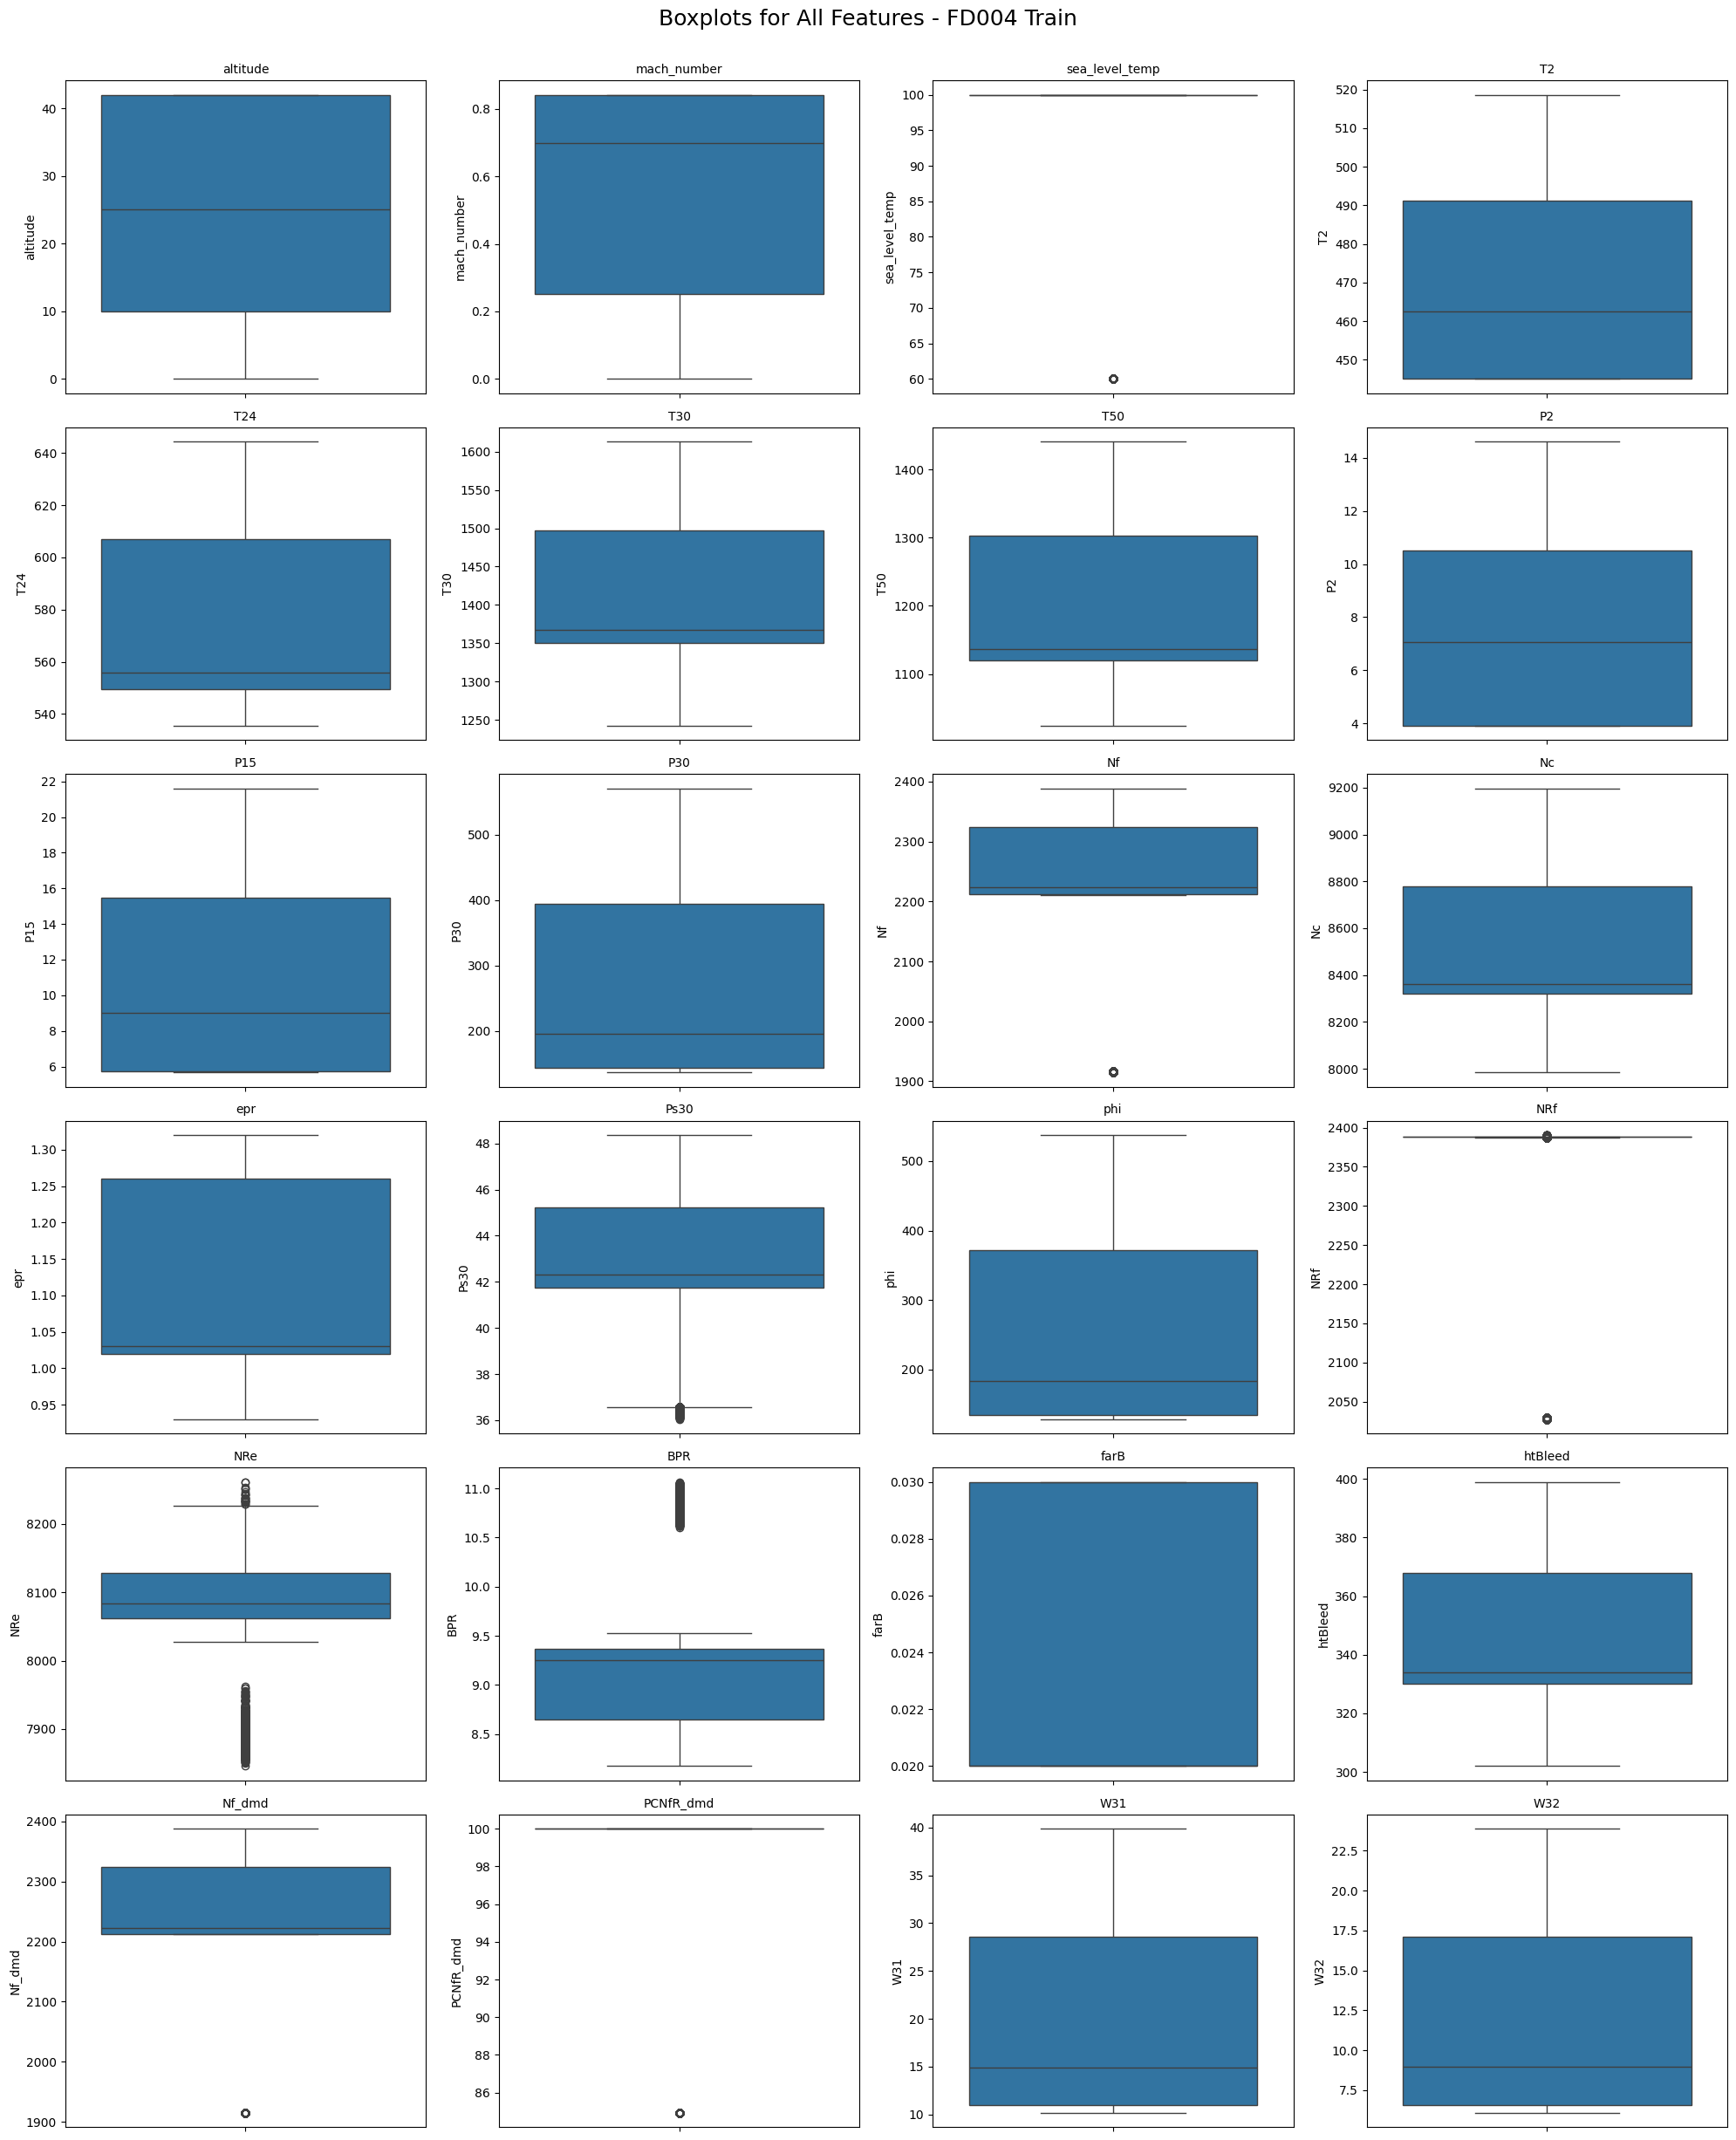

In [16]:
# Boxplots- to see sensor value ranges and we can detect extreme values for FD004
feature_cols2 = df004_train.columns.drop(['engine_id', 'cycle', 'RUL'])
n_features = len(feature_cols2)

# Create subplots
rows = 6
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 24))
axes = axes.flatten()
for idx, col in enumerate(feature_cols2):
    sns.boxplot(data=df004_train, y=col, ax=axes[idx])
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('') 
for j in range(idx + 1, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Boxplots for All Features - FD004 Train', fontsize=18, y=1.02)
plt.show()


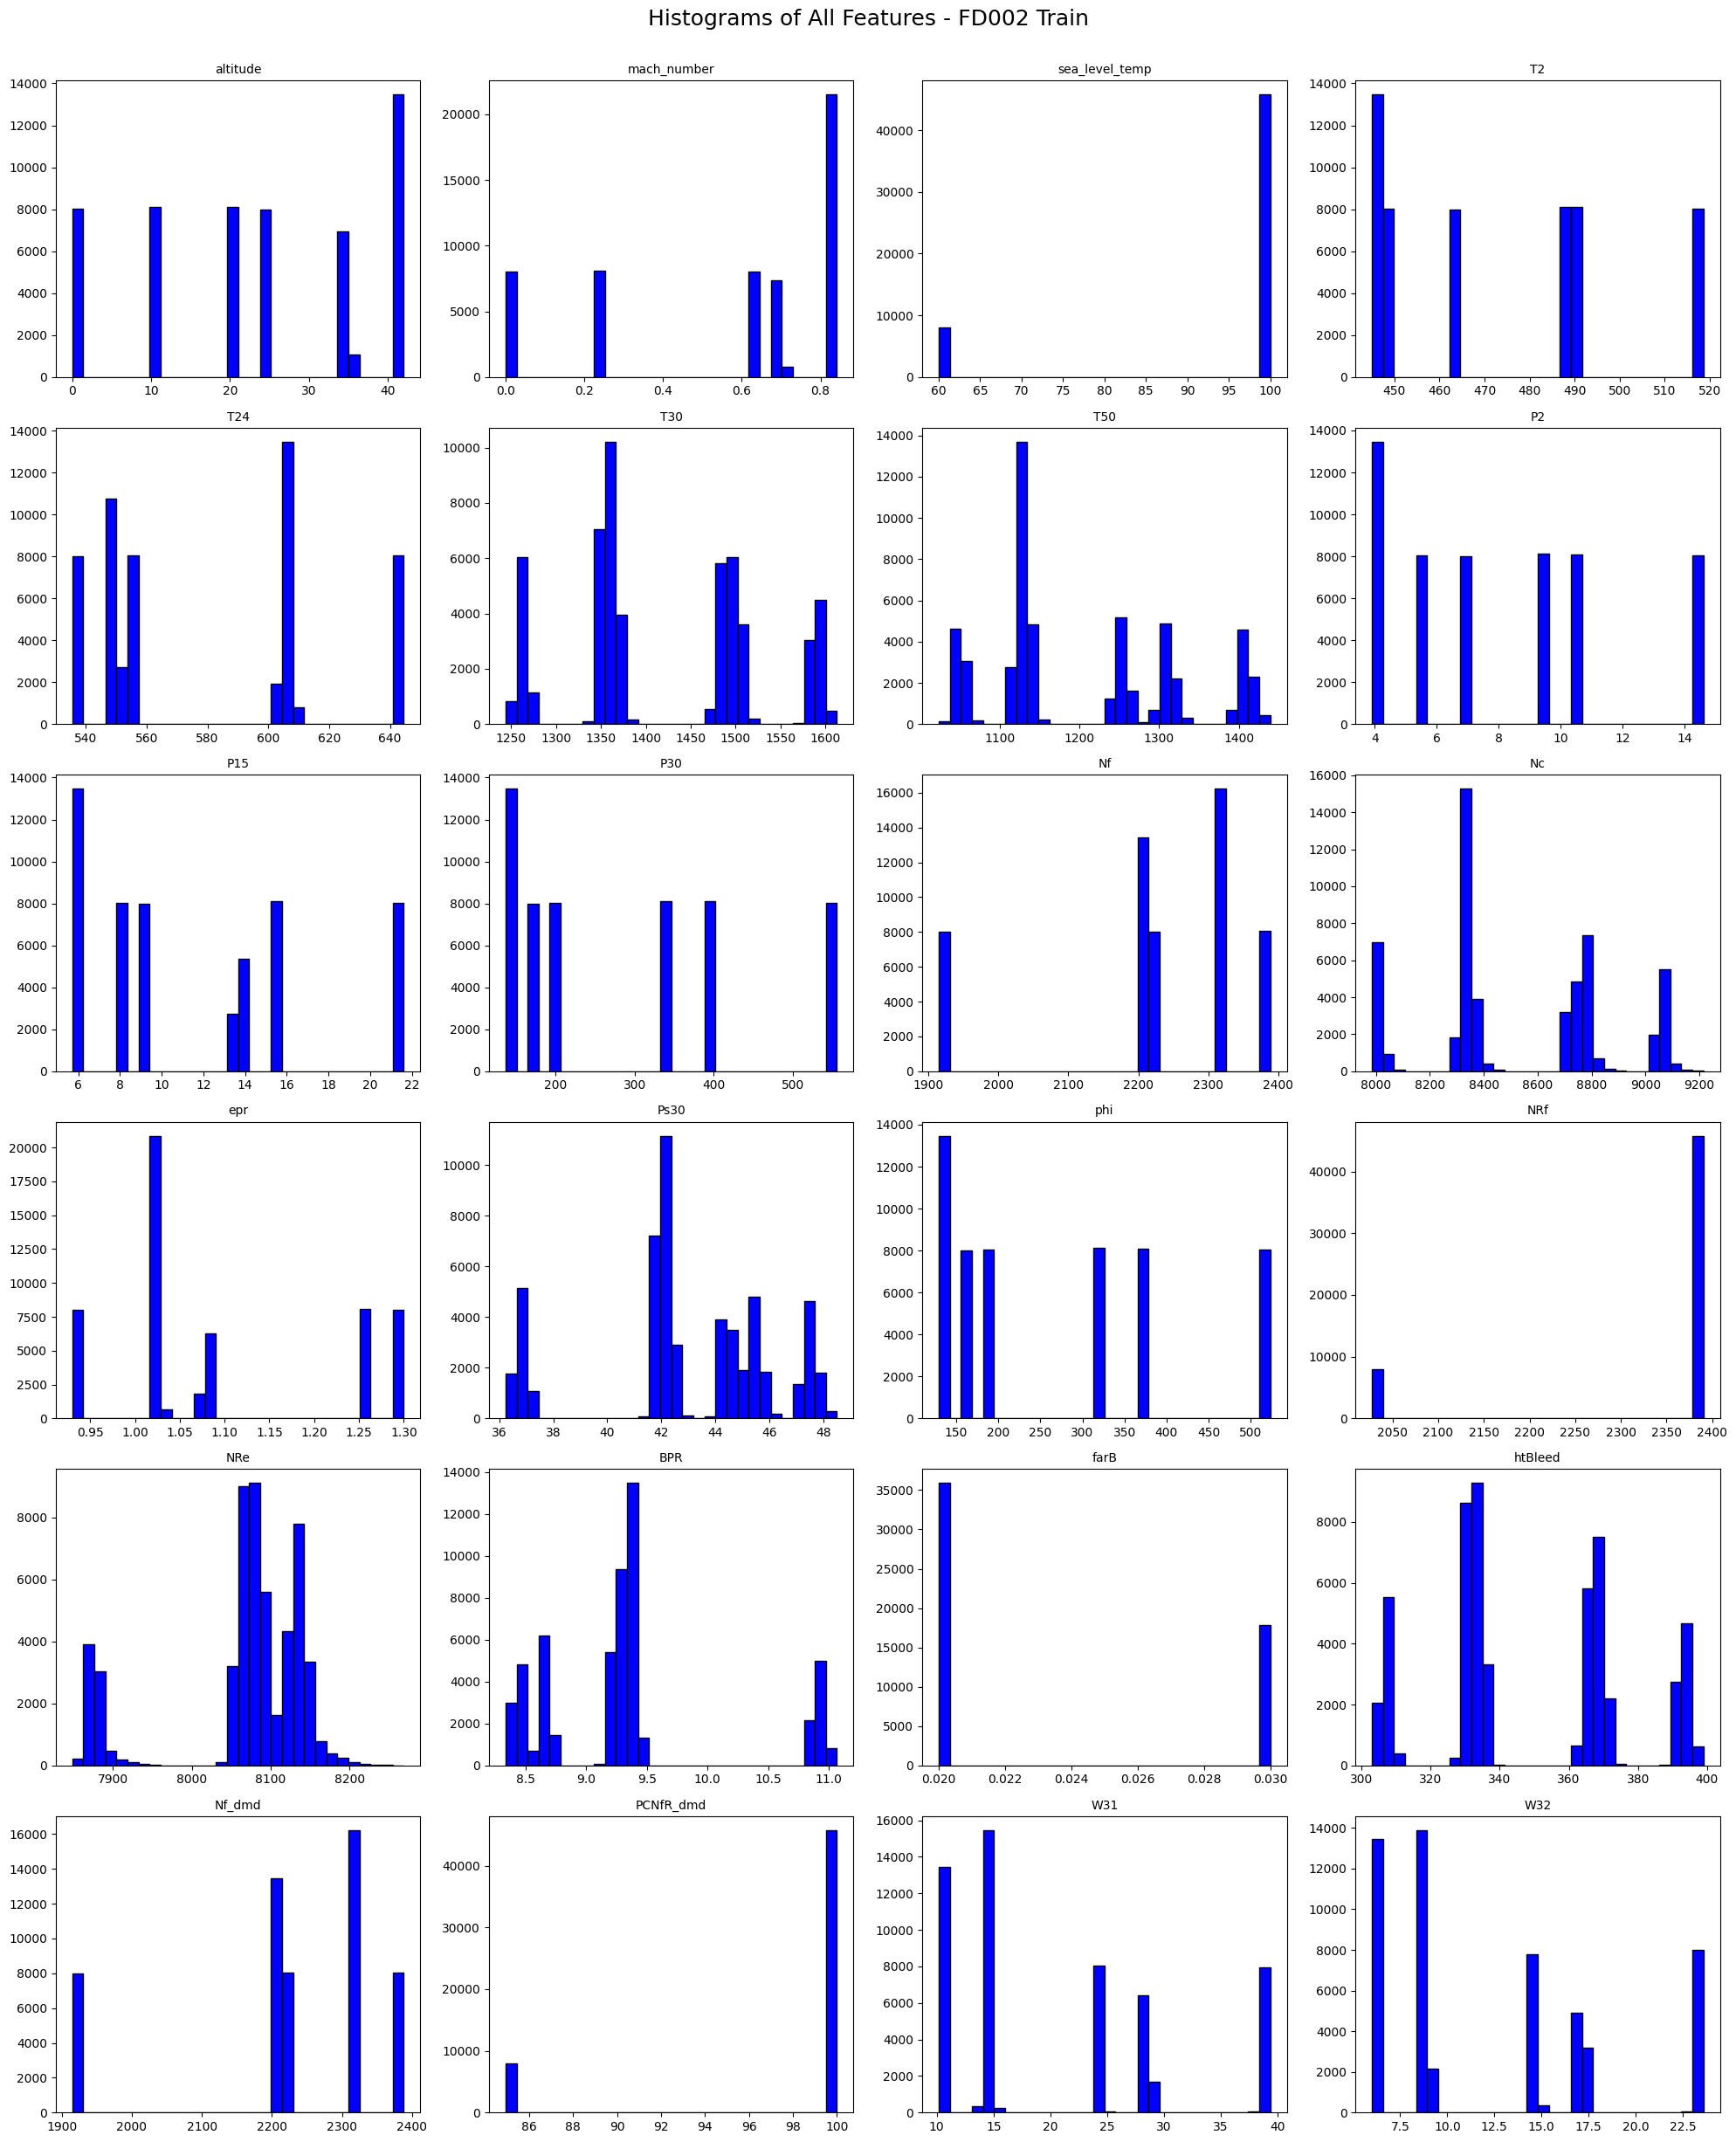

In [108]:
# Histograms
feature_cols1 = df002_train.columns.drop(['engine_id', 'cycle', 'RUL'])
n_features = len(feature_cols1)
rows = 6  
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(20, 24))
axes = axes.flatten()

for idx, col in enumerate(feature_cols1):
    axes[idx].hist(df002_train[col], bins=30, color='blue', edgecolor='black')
    axes[idx].set_title(col, fontsize=10)

for j in range(idx + 1, rows * cols):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.suptitle('Histograms of All Features - FD002 Train', fontsize=18, y=1.02)
plt.show()


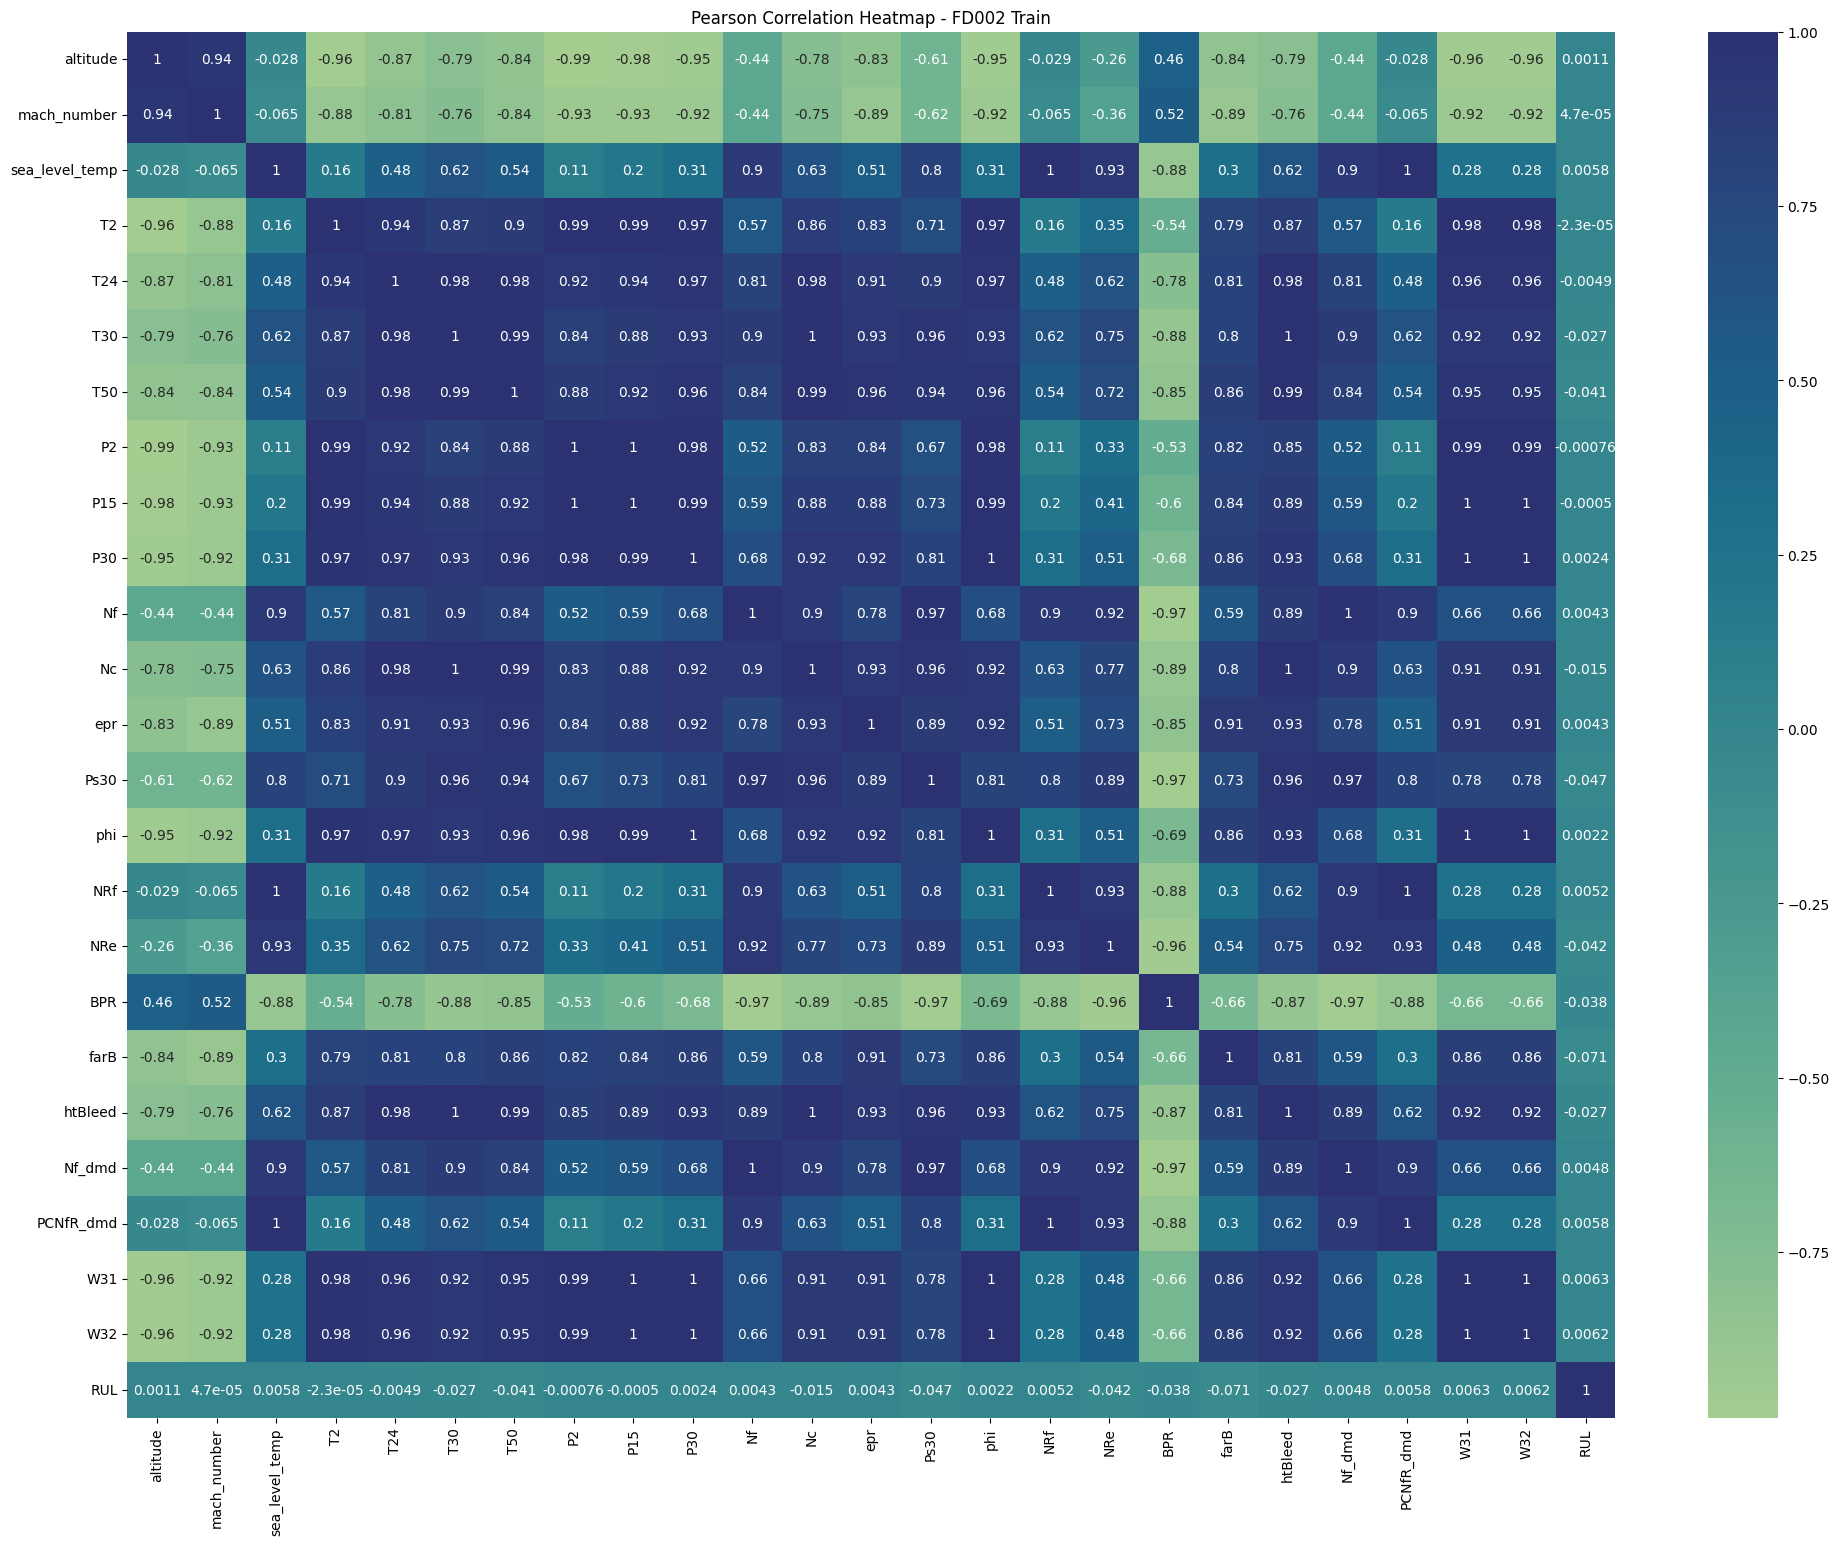

In [109]:
# Correlation heatmap for FD002
feature_cols_fd002 = df002_train.columns.drop(['engine_id', 'cycle'])
corr_fd002 = df002_train[feature_cols_fd002].corr(method='pearson')
plt.figure(figsize=(24,18))
sns.heatmap(corr_fd002, cmap='crest', annot= True)
plt.title('Pearson Correlation Heatmap - FD002 Train')
plt.show()




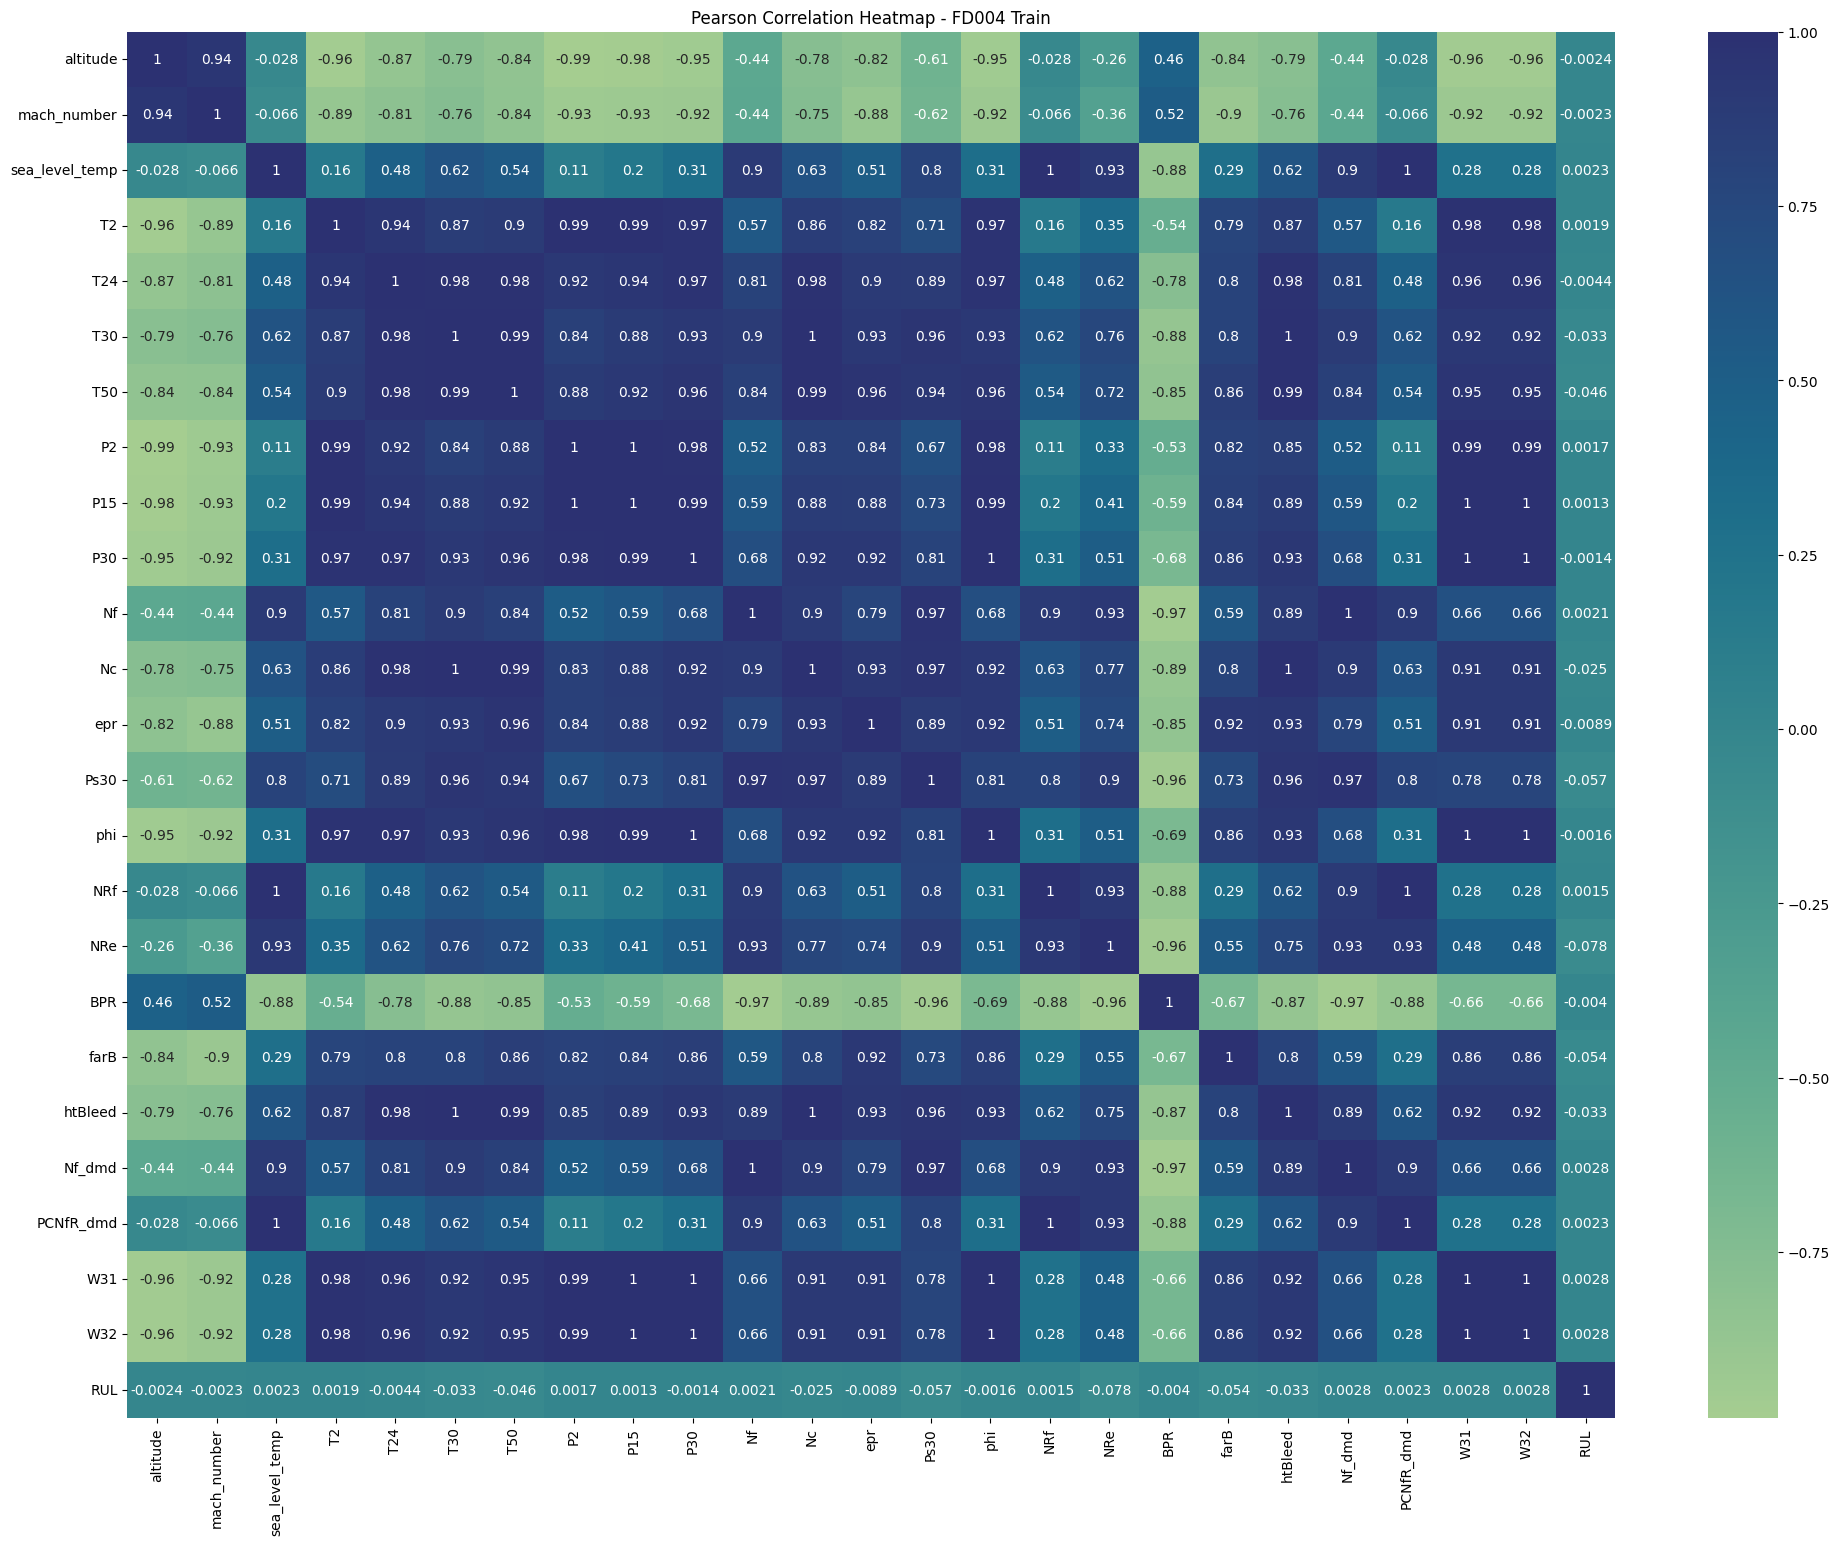

In [ ]:
# Correlation heatmap for FD004
feature_cols_fd004 = df004_train.columns.drop(['engine_id', 'cycle'])
corr_fd004 = df004_train[feature_cols_fd004].corr(method='pearson')
plt.figure(figsize=(24,18))
sns.heatmap(corr_fd004, cmap='crest', annot= True)
plt.title('Pearson Correlation Heatmap - FD004 Train')
plt.show()

# RUL (Target) seems to have non linear interactions with sensor values


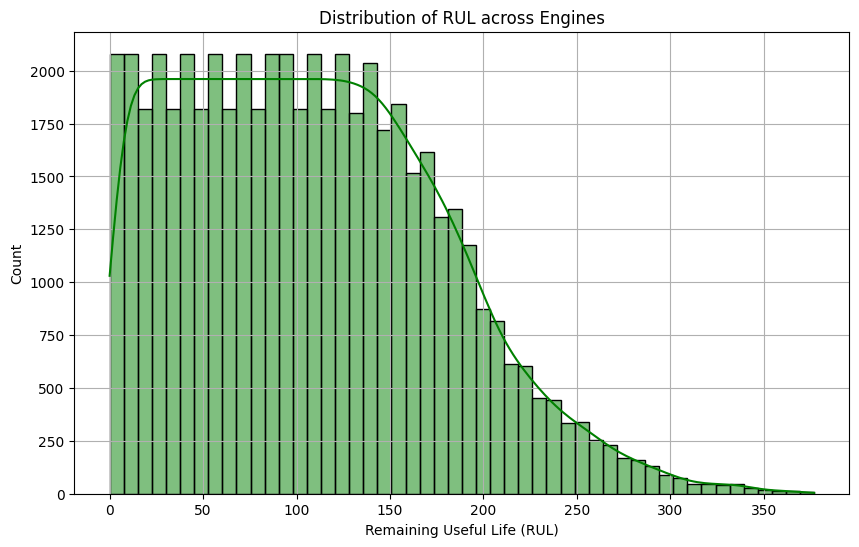

In [111]:
# KDE plot for RUL
plt.figure(figsize=(10,6))
sns.histplot(df002_train['RUL'], bins=50, kde=True, color='green')
plt.xlabel('Remaining Useful Life (RUL)')
plt.title('Distribution of RUL across Engines')
plt.grid(True)
plt.show()



# Feature Engineering / selection

In [18]:
# Create the 3-class distribution in health_stage_code (BASED ON DOMAIN KNOWLEGE AND AERO-MECH RESEARCH)
# --THRESHOLDS CAN BE SUBJECTIVE--
# BUT these thresholds can also be acceptable in the project to avoid-- EXTREME CLASS IMBALANCE
df004_train['health_stage_code'] = np.where(
    df004_train['RUL'] < 25, 2,
    np.where(df004_train['RUL'] < 50, 1, 0))

# Creating the Target variabe using RUL thresholds

In [20]:
df004_train['health_stage_code'].value_counts()

health_stage_code
0    48799
1     6225
2     6225
Name: count, dtype: int64